<span style="font-size:30px">**Medidas de centralidad de los nodos. Parte 6: Visualización de las Centralidades.**</span> 
    
<span style="font-family: 'Verdana'; color: red;"> *Bronquivoide* </span>

### Este notebook tiene como objetivo abordar las centralidades trabajadas con NetworkX (de grado, de cercanía, de intermediación y de eigenvector) ahora bajo un aspecto gráfico.

### Se visualizará una gráfica del tipo $Y vs X$ donde la abcisa sea el nodo (su etiqueta) y la ordenada el valor de la centralidad de acuerdo a los cuatro criterios trabajados en esta serie de notebooks. Esto permite visualizar diversas centralidades distintas, ver si están correlacionadas o si hay algún nodo que sea importante para más de una centralidad.

### Se trabajará con la red usada anteriormente, *ca-netscience.mtx*, por lo que traeremos de vuelta todo lo visto en los notebooks anteriores.

### Para la gráfica usaremos listas por comprensión, la cuáles serán de un formato [ DICCIONARIO[NodoArbitrario] for NodoArbitrario in NuestroGrafoUtilizado ]. Los datos tipo diccionario aparecen porque, como se vio, hacer el display de las distintas centralidades resulta en un diccionario que contiene magnitudes de centralidad para cada nodo de la red.

,0,1
0,2,1
1,3,1
2,4,1
3,5,1
4,16,1
...,...,...
909,374,373
910,376,375
911,377,375
912,377,376


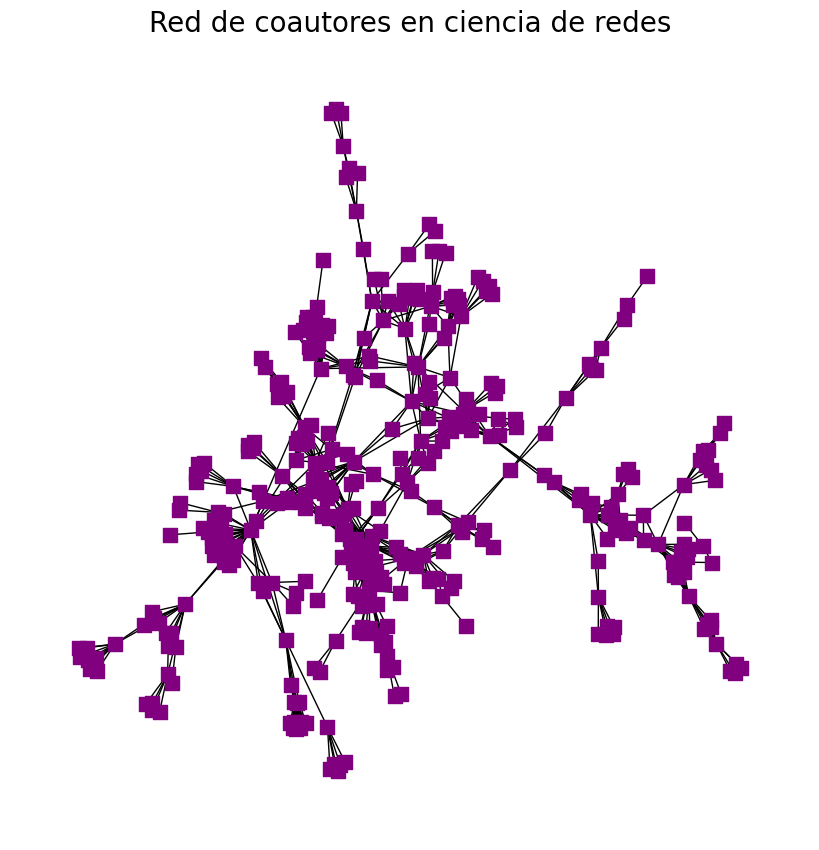

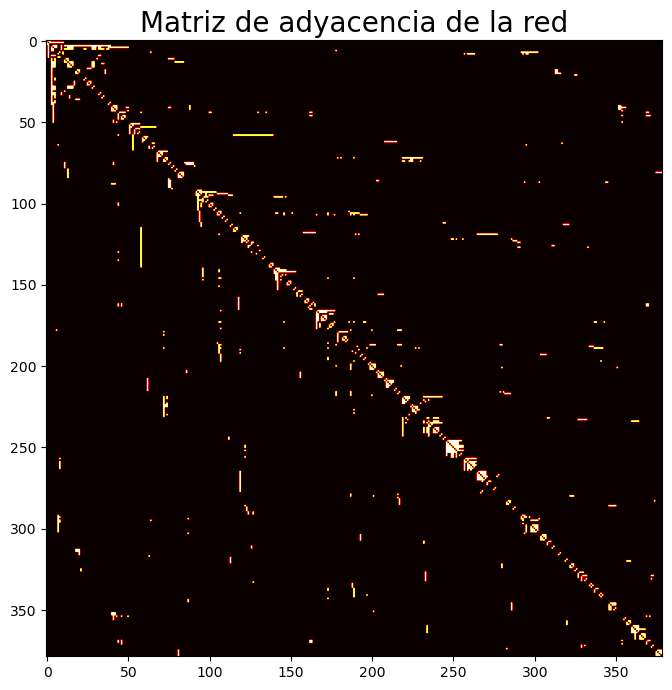

El orden de la matriz es de 379 x 379



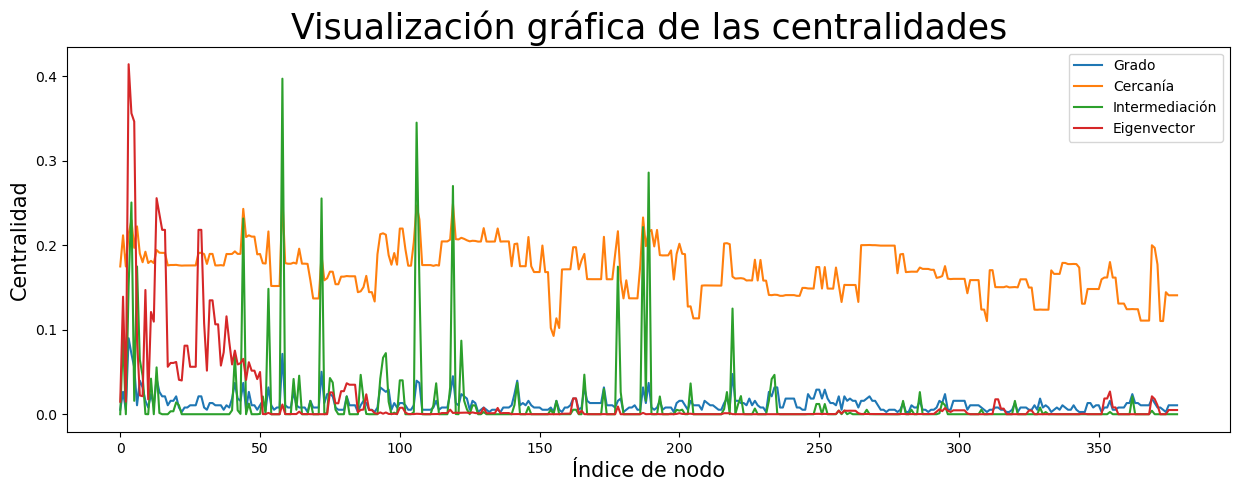

In [10]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Leemos y mostramos la red con un formato adecuado:
datos=pd.read_csv('ca-netscience.mtx',skiprows = 2, header = None,sep = ' ' )
display(datos)

#Generar una red de NetworkX a partir del data frame Pandas:
G=nx.from_pandas_edgelist(datos,source = 0,target = 1) #Formato: (Nodo origen ,  Nodo destino)
plt.figure( figsize = [8,8] )
nx.draw(G,node_size = 100, node_color = 'purple',node_shape = 's') 
plt.title("Red de coautores en ciencia de redes",fontsize=20)
plt.show()

#Matriz de adyacencia (únicamente para ver la estructura de la red):
plt.figure( figsize = [8,8] )
A=nx.to_numpy_array(G)
plt.imshow(A,"hot") #Para ver las intensidades de la imagen que representan a los enlaces podemos usar el formato de mapa de calor
plt.title("Matriz de adyacencia de la red",fontsize=20)
plt.show()
N1,N2=A.shape
print(f"El orden de la matriz es de {N1} x {N2}")
print()

#1) Centralidad de grado:
grado=nx.degree_centrality(G)
Cen_Grad=np.array([grado[i] for i in G])

#2) Centralidad de cercanía:
cercanía=nx.closeness_centrality(G)
Cen_Cerc=np.array([cercanía[i] for i in G])

#3) Centralidad de intermediación:
intermediación=nx.betweenness_centrality(G)
Cen_Int=np.array([intermediación[i] for i in G])

#4) Centralidad de eigenvector:
eigenvector=nx.eigenvector_centrality(G)
Cen_Eig=np.array([eigenvector[i] for i in G])


plt.figure(figsize = [15, 5])
plt.title("Visualización gráfica de las centralidades",fontsize=25)
plt.plot(Cen_Grad, label = 'Grado')
plt.plot(Cen_Cerc, label = 'Cercanía')
plt.plot(Cen_Int, label = 'Intermediación')
plt.plot(Cen_Eig, label = 'Eigenvector')
plt.xlabel("Índice de nodo",fontsize=15)
plt.ylabel("Centralidad",fontsize=15)
plt.legend()
plt.show()




### Notese que la estructura de la lista por comprensión recibe un nodo $i$ en el grafo $G$ y regresa el elemento $i$-ésimo del diccionario de centralidades de acuerdo al orden en $G$, no al orden del diccionario. Las listas por comprensión se convierten a arreglos NumPy, pues las funciones plt reciben formatos de arreglos, no de listas.

# Fin del ejercicio.